<h1><center>Tarea 1: Roja o Azul</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolás Acevedo Villena 
- Nombre de alumno 2: Pablo Ubilla Pavez


### **Link de repositorio de GitHub:** `http://....`

# Temas a tratar

- Programación orientada a objetos.
- Manejo de datos en arreglos/tensores con `Numpy`.
- Análisis exploratorio de datos con `Pandas`
- Preprocesamiento con `Scikit-learn`.
- Composición de preprocesadores con Pipelines.

## Reglas:

- Fecha de entrega: Descrita en U-cursos
- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.



# Descripción del tarea (LEER ESTO).

En el presente notebook se presentan dos problemas, uno de **Segmentación de clientes en tiendas de retail** y otro enfocado en el **Análisis de temperaturas**. Producto de la larga extensión que podría significar la realización de los dos problemas, para efectos de esta tarea deben escoger **SOLAMENTE UNA** sección para desarrollar. Si desea puede borrar la pregunta que no realizará.

<p align="center">
  <img src="https://media1.giphy.com/media/ikwWGan6JZMo7bbf5L/giphy.gif?cid=790b761140b82e1c3d6754790ef49d96e8406bdac2f36d6f&rid=giphy.gif&ct=g">
</p>




#Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML, display

# Libreria para plotear (En colab esta desactualizado plotly)
# !pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.covariance import EllipticEnvelope, MinCovDet
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

----

# 1 Segmentación de Clientes en Tienda de Retail 🛍️

In [2]:
HTML('<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>')

## 1.1 Cargar Dataset [Sin puntos]

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>


*Mr. Lepin Mora* quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail. 

Para esto, el área de ventas les entrega el archivo ```online_retail_II.xlsx``` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

De la primera visualización de los datos, señale los atributos que componen el dataset.

In [3]:
# #########################
df = pd.concat(
    pd.read_excel('./Datasets/online_retail_II.xlsx', sheet_name=None),
    ignore_index=True
)

df.head()
# #########################

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
########################
# csv

# year_2009 = pd.read_csv('./Datasets/year 2009.csv',sep=";")
# year_2010 = pd.read_csv('./Datasets/year 2010.csv',sep=";")
# df = pd.concat([year_2009,year_2010])

# df.head()

Se puede ver que los atributos de la base de datos son: `Invoice, StockCode, Description, Quiantity, InvoiceDate, Price, Customer ID` y `Country`.

## 1.2 Análisis Exploratorio de Datos [1 Punto]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les da **total libertad** para la revisión. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.


#### 1) Tipos de datos

In [4]:
# Describe
print('-'*50)
print('Resumen y cuartiles:\n')
display(df.describe())

# Data types
print('-'*50)
print('Data types:\n')
print(df.dtypes)

# Valores únicos
print('-'*50)
print('Valores únicos:\n')
print(df.nunique())

# Datos faltantes
print('-'*50)
print('Valores faltantes:\n')
print(df.isna().sum())


--------------------------------------------------
Resumen y cuartiles:



,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


--------------------------------------------------
Data types:

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
--------------------------------------------------
Valores únicos:

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64
--------------------------------------------------
Valores faltantes:

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


**Justifique:**

```
Escriba aquí su justificación
```

- En primer lugar, podemos ver en el resumen con `describe` que existen datos negativos tanto en `Quantity` como en `Price`, lo que no tiene sentido, por lo que tenemos datos out of range. Se debería ver si se puede sacar alguna información de estos datos o si es que se deben eliminar.

- En segundo lugar, los tipos de datos con los que estamos trabajando no parecen ser los adecuados. Tenemos atributos categóricos que son tipo `object` o `float64`. Se deberían pasar todos estos a tipo `category` para mayor eficiencia y correcto tratamiento de estos datos (ej: Customer ID claramente no debe ser tratado como un número sino una categoría). 

- En tercer lugar, vemos que existen datos faltantes tanto en `Description` del producto como en `Customer ID`. La descripción debería ir de la mano con el código de stock, por lo que no son un problema estos datos faltantes, mientras que ID del cliente también podría no ser relevante dependiendo del análisis que se quiera hacer

## 1.3 Primeras Visualizaciones [0,5 Puntos]

### 1.3.1 Obtención de TOPs 

Sin considerar los comentarios realizados en la sección 1.2, se les pide obtener el **Top de 30 productos más vendidos** y el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente.

In [64]:
#########################
# Columna de Ventas
df['Sales'] = df['Price']*df['Quantity']

# group by 
gb_atr = 'StockCode'
df_gb = df.groupby(gb_atr)
df_gb = df_gb.sum().reset_index()
df_gb["Utility"]=df_gb['Sales']#df_gb["Quantity"]*df_gb["Price"]

# 30 productos más vendidos
mas_vendidos  = df_gb.sort_values(by='Quantity', ascending=False).head(30)
mas_vendidos[gb_atr] = mas_vendidos[gb_atr].astype('string')

# 30 productos más caros en promedio
mas_caros = df.groupby(gb_atr).mean().sort_values(by='Price', ascending=False).head(30).reset_index()
mas_caros[gb_atr] = mas_caros[gb_atr].astype('string')

# 30 producto que generan mayores ingresos
mas_utilidad = df_gb.sort_values(by='Utility',    ascending=False).head(30)
mas_utilidad[gb_atr] = mas_utilidad[gb_atr].astype('string')


# Barplot mas vendidos
p1 = px.bar(
    mas_vendidos, 
    x='StockCode', 
    y='Quantity',
    barmode='group',
    title='Los 30 productos más vendidos'
    )


# Barplot mas caros
p2 = px.bar(
    mas_caros, 
    x='StockCode', 
    y='Price',
    barmode='group',
    title='Los 30 productos más caros',
    )


#       Barplot mas vendidos
p3 = px.bar(
    mas_utilidad, 
    x='StockCode', 
    y='Utility',
    barmode='group',
    title='Los 30 productos que generan más ingresos',
    )

p1.show()
p2.show()
p3.show()
#########################

**Justifique:**

```
Escriba su justificación aquí:
```
##### *cambiar un poquito*

Se ve que no hay una implicancia directa sobre que los artículos más vendidos sean los que más generan ganancia, ya que los primeros lugares entre los que generan mayor ingreso nisiquiera aparecen en los 30 lugares de los más vendidos. Esto se puede entender dado que los productos más vendidos suelen ser los de precios bajos, mientras que los productos más caros no suelen tener tanta frecuencia de compra (podemos pensar en esto a algo similar a lo que sería una curva precio-demanda, pero obviamente no es lo mismo).

### 1.3.2 Visualización del registro temporal 

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

**Hint**: Para realizar esta task generen una función (quizás en el futuro les sea necesario 😮).

In [65]:
#########################

def ventas_temporales(df_in):
    df = df_in.copy() # copy
    df['Date'] = df['InvoiceDate'].dt.date # año-mes-día
    gb = df.sort_values(by='Date').groupby('Date').sum().reset_index()

    # Barplot ventas en el tiempo
    p = px.bar(
        gb, 
        x='Date', 
        y='Sales',
        barmode='group',
        title='Ventas en el tiempo',
        width=1200, 
        height=600
        )
    p.show()

ventas_temporales(df)
#########################

**Justifique:**

```
Escriba aquí su justificación:
```
Se puede ver en el gráfico que existen bastantes situaciones anómalas, como los días en donde hay un excesivo aumento en las ventas ciertos días del año 2010, pero aún más extraño, hay días en los que se observan ventas negativas, lo que no tiene ningún sentido. Además, se puede ver que existen días con ventas excesivamente más altas que el resto de las fechas (como el 9 de diciembre de 2011), lo que puede ser simplemente fechas outliers o podrían ser anomalías que se deban a algún error.


## 1.4 Limpieza de Datos [1,5 Puntos]
Como pudo ver en 1.1, 1.2 y 1.3 los datos presentan valores "extraños", es por esto que se le solicita que realice una **función** que permita **limpiar el dataset**. Realice esta función en base observaciones propias y justifique su elección.

Una vez realizada la función, **grafique nuevamente** el registro de ventas en el tiempo. ¿Es posible ver cambios?, Comente que observa.

In [152]:
#########################

# Category en vez de objeto
print('-'*50)
print('Nuevos data types:\n')
cat_cols = ['Invoice','StockCode','Description', 'Customer ID','Country'] # columnas categóricas
df[cat_cols] = df[cat_cols].astype('category')  
print(df.dtypes)

# Precios o cantidades negativas fuera
df = df[(df["Price"]>0) & (df["Quantity"]>0)]

# No podemos analizar clientes sin ID
df = df[~df['Customer ID'].isna()]
print('-'*50)
print('Datos Faltantes:\n')
print(df.isna().sum())

# Quitamos filas repetidas
df.drop_duplicates(inplace=True, ignore_index=True)

ventas_temporales(df)

#########################

--------------------------------------------------
Nuevos data types:

Invoice              category
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country              category
Date                   object
date_diff               int64
Sales                 float64
dtype: object
--------------------------------------------------
Datos Faltantes:

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Date           0
date_diff      0
Sales          0
dtype: int64


**Justificación de la limpieza:**

```
Escriba aquí su justificación
```

**Comentarios sobre el gráfico:**

```
Escriba aquí su justificación
```

### 1.4.1 Gráfico

**Justifique:**

```
Escriba aquí su justificación
```

## 1.5 Creación de nuevas Caracteristicas [1.5 Puntos] 

El área de ventas le comenta que existe una metodología especial para realizar la segmentación de clientes, esta recive como nombre **LRMFP** y cada una de sus siglas se define como:

- Length (L): Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.
- Recency (R): Indica la actualidad de la interacción de un cliente con la empresa, y da información sobre la tendencia a repetir la compra. Se define como: 
$$Recency(n)=\dfrac{1}{n} \sum^n_{i=1} date\_diff(t_{fecha final}, t_{m-i+1})$$

 Donde $date\_diff$ representa la diferencia en días entre la fecha de finalización del periodo de observación ($t_{fecha final}$), y la fecha de una visita del cliente cercana a $t_{fecha final}$, t_{m-i+1}; t_{m} es la última visita del cliente; y n es el número de visitas recientes del cliente consideradas.

- Monetary (M): El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- Frequency (F): Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- Periodicity (P): Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

Diseñe una función que permita obtener las caracteristicas **LRMFP**. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto. 

Una referencia interesante es [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.


In [67]:
# Columna con fecha diaria
df["Date"] = df['InvoiceDate'].dt.date #pd.to_datetime(df['Date'])

# Primer gb para obtener las fechas de cada compra y el segundo para tener las últimas n
gb2 = df.groupby(['Customer ID','Date'])

# Frequency
F=gb2.tail(1).groupby(["Customer ID"]).count()["Date"]
clientes_aptos = F>=3 # REVISAR POR QUE n=3
#print(clientes_aptos)
F = F[clientes_aptos]
print(F)

# Length
gb = df.groupby("Customer ID")
L = (gb["Date"].max() - gb["Date"].min()).dt.days
L = L[clientes_aptos]
print(L)



# Recency
final_date = df['Date'].max()
df['date_diff'] = (final_date - df['Date']).dt.days
n = 3
# confrimar que a lo más 3 en cada ID
# display(gb2.groupby('Customer ID').count())
R = gb2.tail(1).groupby('Customer ID').tail(n).groupby('Customer ID').mean()['date_diff']
R = R[clientes_aptos]
print(R)


# Monetary 

M = gb.sum()["Sales"]/F
M = M[clientes_aptos]
print(M)


# Periodicity
shift_date = gb2.tail(1)[["Customer ID","Date"]].sort_values(by="Date").groupby('Customer ID').shift(periods=1, axis=0)
df_dates = gb2.tail(1)[["Customer ID","Date"]].sort_values(by="Date")
df_dates["InvoiceDateShift"] = shift_date
df_dates["diff_dates"] = (df_dates["Date"] - df_dates["InvoiceDateShift"]).dt.days
df_dates.dropna(inplace=True)
P = df_dates.groupby("Customer ID").std()["diff_dates"]
P = P[clientes_aptos]
print(P)

Customer ID
12346.0     8
12347.0     8
12348.0     5
12349.0     4
12352.0     9
           ..
18273.0     4
18276.0     6
18277.0     4
18283.0    19
18287.0     6
Name: Date, Length: 3185, dtype: int64
Customer ID
12346.0    400.0
12347.0    402.0
12348.0    363.0
12349.0    571.0
12352.0    356.0
           ...  
18273.0    588.0
18276.0    686.0
18277.0    436.0
18283.0    655.0
18287.0    529.0
Name: Date, Length: 3185, dtype: float64
Customer ID
12346.0    500.333333
12347.0     56.666667
12348.0    213.666667
12349.0    331.666667
12352.0     62.666667
              ...    
18273.0    118.000000
18276.0    288.666667
18277.0    290.333333
18283.0      9.333333
18287.0    100.333333
Name: date_diff, Length: 3185, dtype: float64
Customer ID
12346.0    9694.557500
12347.0     615.191250
12348.0     403.880000
12349.0    1107.172500
12352.0     316.648889
              ...     
18273.0      89.250000
18276.0     276.086667
18277.0     295.012500
18283.0     140.257895
18287.0     6

In [129]:
df_clientes = pd.concat([L,R,M,F,P],axis=1)#,columns=["Lenght","Recency","Monetary","Frequency","Periodicity"],index=clientes_aptos)
df_clientes.columns = ["Length","Recency","Monetary","Frequency","Periodicity"]
# df_clientes.reset_index(inplace=True)
df_clientes

,Length,Recency,Monetary,Frequency,Periodicity
Customer ID,,,,,
12346.0,400.0,500.333333,9694.557500,8,76.018481
12347.0,402.0,56.666667,615.191250,8,19.051309
12348.0,363.0,213.666667,403.880000,5,57.407171
12349.0,571.0,331.666667,1107.172500,4,186.508266
12352.0,356.0,62.666667,316.648889,9,60.500295
...,...,...,...,...,...
18273.0,588.0,118.000000,89.250000,4,123.559702
18276.0,686.0,288.666667,276.086667,6,122.829964
18277.0,436.0,290.333333,295.012500,4,170.294842


**Ejemplo de resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

## 1.5.1 Visualización de información y Outliers [0,5]

Visualice las diferenes caracteristicas obtenidas y comente que observa de ellas. ¿Es posible observar valores anómalos?. Proponga un mecanísmo sencillo para solucionar este problema (NO LO IMPLEMENTE).

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Periodicity'}>, <AxesSubplot:>]],
      dtype=object)

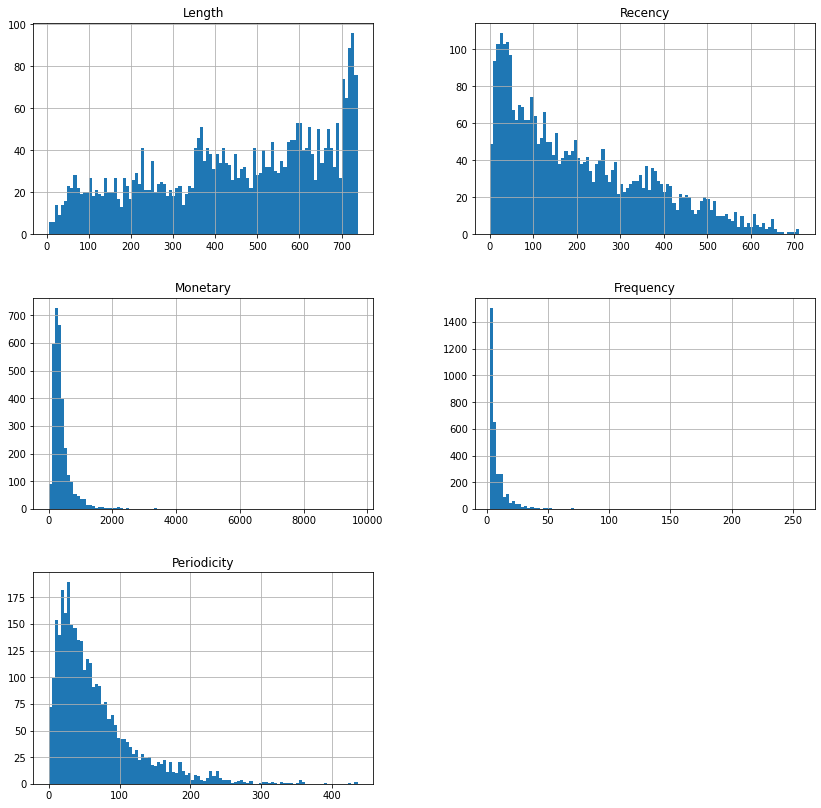

In [130]:

df_clientes.hist(figsize=(14,14),bins=100)

**Justifique:**

```
Escriba aquí su justificación
```

### 1.5.1.1 Implementación del filtro de outliers [Bonus - 0,5 puntos]

Implemente el filtro de outliers como un [Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) de `Scikit-learn`.

In [155]:
#########################

def outlier_filter(df_clientes):

    # Primer etiquetado de outliers con iForest
    X = df_clientes
    n_trees, n_features = 1000, 3 # Parámetros
    iForest = IsolationForest(n_estimators=n_trees, max_features=n_features).fit(X)
    outlier_tag = iForest.predict(X)

    # Segundo etiquetado de outliers con Elliptic Envelope
    X_standard = StandardScaler().fit_transform(X) # standarización
    ee = EllipticEnvelope().fit(X_standard)
    outlier_tag2 = ee.predict(X_standard)

    # Filtramos los que sean outliers en ambos métodos
    innliers = (outlier_tag2<0) & (outlier_tag<0)

    # Columna de etiquetado outlier
    X['Outlier'] = innliers
    return X

# Transformer
transformer = FunctionTransformer(outlier_filter)
df_outliers = transformer.transform(df_clientes)
df_outliers
#########################

,Length,Recency,Monetary,Frequency,Periodicity,Outlier
Customer ID,,,,,,
12346.0,400.0,500.333333,9694.557500,8,76.018481,True
12347.0,402.0,56.666667,615.191250,8,19.051309,False
12348.0,363.0,213.666667,403.880000,5,57.407171,False
12349.0,571.0,331.666667,1107.172500,4,186.508266,True
12352.0,356.0,62.666667,316.648889,9,60.500295,False
...,...,...,...,...,...,...
18273.0,588.0,118.000000,89.250000,4,123.559702,False
18276.0,686.0,288.666667,276.086667,6,122.829964,False
18277.0,436.0,290.333333,295.012500,4,170.294842,False


## 1.6 Segmentación [1 Punto]



Finalmente *Don Mora* le pregunta si seria posible realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de Clusters para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.6.1 Estandarizar Caracteristicas

Construya una función que nos permita estandarizar los atributos generados anteriormente. Para esto recuerde que una estandarización basica es:

$$Z = \dfrac{x-\mu}{s}$$

Con esto buscamos que cada atributo tenga un $\mu$ igual a 0 y una $\sigma$ igual a 1 (compruebe esto).

In [39]:
df_clientes.dtypes

Customer ID    category
Length          float64
Recency         float64
Monetary        float64
Frequency         int64
Periodicity     float64
dtype: object

In [49]:
df_clientes

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,12346.0,400.0,500.333333,9694.557500,8,76.018481
1,12347.0,402.0,56.666667,615.191250,8,19.051309
2,12348.0,363.0,213.666667,403.880000,5,57.407171
3,12349.0,571.0,331.666667,1107.172500,4,186.508266
4,12352.0,356.0,62.666667,316.648889,9,60.500295
...,...,...,...,...,...,...
3180,18273.0,588.0,118.000000,89.250000,4,123.559702
3181,18276.0,686.0,288.666667,276.086667,6,122.829964
3182,18277.0,436.0,290.333333,295.012500,4,170.294842
3183,18283.0,655.0,9.333333,140.257895,19,35.172079


In [59]:
scaler = StandardScaler()
scaler.fit(df_clientes.drop("Customer ID",axis=1))
ccustomers = pd.DataFrame(scaler.transform(df_clientes.drop("Customer ID",axis=1)),columns=["Length","Recency","Monetary","Frequency","Periodicity"])

**Comprobación:**

In [60]:
print("Promedio: \n",ccustomers.mean(),"\n")
print("Desviación estandar: \n",ccustomers.std())

Promedio: 
 Length         2.359878e-17
Recency        2.198137e-16
Monetary      -2.516738e-17
Frequency      4.235231e-18
Periodicity   -7.153297e-17
dtype: float64 

Desviación estandar: 
 Length         1.000157
Recency        1.000157
Monetary       1.000157
Frequency      1.000157
Periodicity    1.000157
dtype: float64


### 1.6.2 Clustering

Estandarizados los datos un compañero de trabajo les facilita un Código para evaluar la cantidad de cluster óptimos para separar los datos. (Otra forma seria revisando la Silhoutte).

En esta parte solo se le pedirá reemplazar la variable ```ccustomers``` por la del dataframe estandarizado.

In [64]:
# Usamos metodo del codo para escoger el k que mejor ajusta el cluster.
import plotly.graph_objs as go

elbow = pd.DataFrame(columns=['SSE','k'])
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ccustomers)
    elbow = elbow.append({'SSE': kmeans.inertia_, 'k': k}, ignore_index=True)

# Son ploteados los Resultados
fig = go.Figure(data=[
    go.Scatter(x = elbow.k, y=elbow.SSE, mode='lines'),
    go.Scatter(x = elbow.k, y=elbow.SSE, mode='markers')
])

fig.update_layout(title="Evaluación de los Clusters (Metodo del Codo):",
             
                 xaxis_title = "Numero de Clusters:",
                 yaxis_title = "SSE",
                 showlegend=False)
fig.show()

### 1.6.3 Segmentación de Clientes 🎁

En base al gráfico anterior escoja un valor que encuentren correcto. Para esto cambie el valor de "k" en el codigo de mas abajo.

In [88]:
k=6
model = KMeans(n_clusters=k, random_state=80)
model.fit(ccustomers)

KMeans(n_clusters=6, random_state=80)

Genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique.


In [89]:
df_clientes["Cluster"] = model.labels_
#########################
df_clientes.groupby("Cluster").mean()
#########################

,Length,Recency,Monetary,Frequency,Periodicity
Cluster,,,,,
0,620.815542,110.319466,464.333584,13.685243,47.491213
1,222.489115,102.401064,334.229434,5.503628,36.691526
2,445.764706,187.705882,5015.059868,23.588235,42.269917
3,275.593193,440.058347,350.148312,4.742301,50.761225
4,726.809524,12.888889,820.032713,115.809524,5.775034
5,513.661376,292.977660,352.903688,4.275132,164.847026


**Justifique:**

```
Escriba aquí su justificación
```


**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
|         | mean    | mean      | mean     | mean        | mean  | count |
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

--------------------------------------------------------------------------------

# 2 Clima Chileno ☀️

In [ ]:
HTML('<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/fGr-njYF_U0?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></p>')

## 2.1 Cargar Dataset

<p align="center">
  <img src="https://cdn.worldvectorlogo.com/logos/kiwi-3.svg" width='150px'>
</p>

`Kiguix`, Una prestigiosa empresa de software esta interesada en ingresar al mundo de la predicción del tiempo, por lo que se ha puesto en contacto con ustedes (unos expertos en Data Science) para analizar los datos.

Para comenzar el administrador de ```Kiguix``` les entrega el dataset llamado ```cr2_tasDaily_2018.csv``` el que posee un gran registro de temperaturas obtenidas en mas de **300 estaciones metereologicas*** de Chile. Con esto les solicita si pueden explorar este dataset y ver si es posible observar caracteristicas relevantes de los datos.

Como **primera Task** se le solicita cargar el archivo y mostrar una pequeña muestra del dataset a estudiar.

In [ ]:
#########################
    Código Aquí
#########################

## 2.2 Exploración y limpieza de datos

Cargado los datos, el administrador les consulta si es posible realizar un analisis de los datos en el estado que se encuentran. ¿Es posible observar información relevante al realizar un analisis exploratorio de los datos?. Recuerde justificar su respuesta en la casilla **Justifique**, utilice como argumento lo visto en la exploración de datos realizada.

### 2.2.1 ¿Es Posible Realizar en Este Estado un Análisis Exploratorio de los Datos? [0,5]


In [ ]:
#########################
    Código Aquí
#########################

**Justificación**

```
Escriba aqui su respuesta
```

### 2.2.2 Limpieza de datos [1 Punto]

Omitiendo su respuesta anterior, el jefe de ```Kiguix``` les comenta que está interesado en generar un Dataset "ordenado" para las estaciones meteorológicas que llevan por **Nombre**:

- 'Pichoy Valdivia Ad.'
- 'Pudahuel Santiago'
- 'Santo Domingo Ad.'
- 'Juan Fernandez Estacion Meteorologica'
- 'Futaleufu Ad.'
- 'Santa Juana'
- 'Lautaro Embalse'

Con esto les solicita que creen un DataFrame con columnas que contengan (1) el año en que fue tomada la muestra, (2) el mes en que se tomó la muestra, (3) la fecha del año y mes en que se tomó la muestra, (4) altura a nivel del mar que se encuentra la estación, (5) latitud y (6) longitud de la estación, (7) el nombre de la estación meteorológica y (8) la temperatura promedio del mes. Su jefe es crítico en señalar que necesita las columnas en este orden y que deja en usted el cargo de tomar las asunciones de que valores omitir en el DataFrame. En caso de ser necesario justifique asunciones.



**Ejemplo de tabla solicitada:**

|      |   Year | Month     | Dates               |   altura |   latitud |   longitud | station                               |      Temp |
|-----:|-------:|:----------|:--------------------|---------:|----------:|-----------:|:--------------------------------------|----------:|
|    0 |   1961 | August    | 1961-08-01 00:00:00 |      347 |  -43.1889 |   -71.8525 | Futaleufu Ad.                         |  6.2      |
|    1 |   1961 | December  | 1961-12-01 00:00:00 |      347 |  -43.1889 |   -71.8525 | Futaleufu Ad.                         | 13        |
|    2 |   1963 | April     | 1963-04-01 00:00:00 |       35 |  -33.6367 |   -78.835  | Juan Fernandez Estacion Meteorologica | 17.9      |
|    3 |   1965 | January   | 1965-01-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 18.0818   |
|    4 |   1965 | February  | 1965-02-01 00:00:00 |      347 |  -43.1889 |   -71.8525 | Futaleufu Ad.                         | 14.8      |
|    5 |   1965 | February  | 1965-02-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 21.8214   |
|    6 |   1965 | March     | 1965-03-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 20.7759   |
|    7 |   1965 | April     | 1965-04-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 18.244    |
|    8 |   1965 | May       | 1965-05-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 15.7233   |
|    9 |   1965 | June      | 1965-06-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 16.1467   |
|   10 |   1965 | July      | 1965-07-01 00:00:00 |      560 |  -28.6672 |   -70.6625 | Santa Juana                           | 14.4516   |

In [ ]:
#########################
    Código Aquí
#########################

**Justifique:**

```
 Escriba aqui su respuesta
```

### 2.2.3 Nueva exploración de datos [1 Punto]

Visto que el nuevo DataFrame entrega una estructura mas ordenada de los datos se decide hacer una nueva exploración de los datos, para esto se les pide que:

- Aplicar las 3 técnicas de EDA que usted estime conveniente.
- Realicen un Box-plot temporal de los Datos utilizando plotly.
- Graficar tendencia de la temperatura para cada uno de los meses del año.

Comente que puede observar de los datos. ¿Es posible observar alguna tendencia o patron?. Justifique.

In [ ]:
#########################
    Código Aquí
#########################

In [ ]:
#########################
    Código Aquí
#########################

**Justifique:**

```
 Escriba aqui su respuesta
```

### 2.2.3.1 Representación interesante [Bonus - 0,5 Puntos]


Implemente la siguiente visualización y proponga otra que considere útil.
Visite la referencia de [plotly](https://plotly.com/python) y [px.line](https://plotly.com/python/line-charts/) para mayor información.

In [ ]:
#########################
    Código Aquí
#########################

## 2.3 Pipeline y Predicción

### 2.3.1 Encoding [2 Puntos]

Contentos con su desempeño ```Kiguix``` les pide realizar su tarea más ambiciosa, la que consiste en crear un pipeline para predecir temperaturas futuras. Para esto les señala que desea realizar el siguiente encoding para las columnas del DataFrame creado en la sección ```2.2.2```:

- Codificar el atributo categórico ```station```.
- Obtener el MinMaxScaler de los atributos ```latitud```, ```longitud``` y ```altura```.
- Realizar una codificación cíclica de ```Year``` y ```Month``` ([referencia de ayuda](https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning)).

Para el caso de la codificación cíclica deberá crear una clase ```class CyclicalEncoding(BaseEstimator, TransformerMixin)``` para la codificación cíclica, por lo que se recomienda ver la [documentación](https://sklearn-template.readthedocs.io/en/latest/user_guide.html).




In [ ]:
#########################
    Código Aquí
#########################

### 2.3.2 Pipeline! [1 Punto]

Realizado el encoding añadan este a un pipeline, anexando como último paso un modelo de regresión. Para el modelo de regresión puede escoger uno de su preferencia o escoger un ```DecisionTreeRegressor()``` o ```LogisticRegression()```. 

Hecho esto, ```Kiguix``` en su rol de querer saber fehacientemente el desempeño de este modelo le sugiere utilizar R2 score, el cual es un estadístico que nos permite visualizar que tan bien predice un modelo de regresión. ¿Que tal le va a la regresión?, ¿Sera coherente utilizar solo estos atributos para predicciones?, Justifique su respuesta.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        dataset.drop(columns='Temp'),
        dataset.Temp,
        shuffle=True,
        test_size=0.3,
        random_state=42)

##############################
    Código Aquí Pipeline
##############################

pipeline.fit(X_train, y_train)
predicted_regression = pipeline.predict(X_test)

# Metrica util para medir regresiones
R2score = r2_score(y_test, predicted_regression)

**Justifique:**

```
 Escriba aqui su respuesta
```

### 2.3.3 Predicción del Futuro 🔮 [0,5 Puntos]

En su afán por el proyecto, el don *Dimadon Vallejos, CEO de `Kiguix`* les entrega el siguiente codigo para visualizar las predicciones. ¿Es coherente lo realizado?, comente.

In [ ]:
# Filtramos ciudad
data_santiago = dataframe_train[dataframe['station']=='Pudahuel Santiago']

# Creamos Información para predecir los proximos años
Prox_anho = data_santiago[data_santiago['Year']==2017][['Year', 'Month','Dates', 'altura', 'latitud',	'longitud', 'station']]
Prox_anho.Year.replace(2017,2018, inplace=True)

# Definimos el regresor entrenado anteriormente
rgr = regressor

# Predecimos
temp_2018 = rgr.predict(Prox_anho)

# Generamos el nuevo DataFrame
temp_2018 = {'Month':data_santiago['Month'].unique(), 'Temp':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

,Month,Temp,Year
0,1,17.654839,2018
1,2,17.879641,2018
2,3,14.263447,2018
3,4,11.925578,2018
4,5,9.131106,2018
5,6,7.234667,2018
6,7,9.131106,2018
7,8,11.925578,2018
8,9,14.263447,2018
9,11,17.654839,2018


In [ ]:
import plotly.graph_objects as go

forecasted_temp = pd.concat([data_santiago,temp_2018], sort=False).groupby(by='Year')['Temp'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(x=forecasted_temp['Year'], y=forecasted_temp['Temp'], mode='lines'),
    go.Scatter(x=forecasted_temp ['Year'], y=forecasted_temp['Temp'], mode='markers')
])
fig.update_layout(title='Temperatura predicha en el tiempo:',
                 xaxis_title='Time', yaxis_title='Grados Celcius')
fig.show()

**Justifique:**

```
 Escriba aqui su respuesta
```

# Cierre
Recuerden que la tarea tiene un plazo de entrega de dos semanas y que **los días de atraso son válidos para las tareas**. Cualquier duda de la tarea, no duden en contactarnos por mail o U-cursos.



<p align="center">
  <img src="https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif">
</p>